## Tutorial: El Perceptrón (Clasificador Lineal) con Scikit-learn

Este notebook sirve como una introducción práctica al Perceptrón, el clasificador lineal más fundamental y el precursor de las redes neuronales modernas. Implementaremos un Perceptrón utilizando la librería scikit-learn en Python para resolver un problema de clasificación binaria simple.

## 1.1 Fundamentos de la Técnica

El Perceptrón es un algoritmo de aprendizaje supervisado para la clasificación binaria. Fue inventado en 1957 por Frank Rosenblatt en el Laboratorio Aeronáutico de Cornell.

Conceptualmente, el Perceptrón modela una única "neurona" artificial. Recibe un conjunto de entradas (características), les aplica una ponderación (pesos), suma los resultados (más un sesgo) y pasa esta suma a través de una función de activación escalón (o función de paso) para producir una salida binaria (generalmente 0 o 1, o -1 y 1).

El proceso de "aprendizaje" del Perceptrón (el algoritmo de aprendizaje del Perceptrón) es iterativo. Ajusta sus pesos basándose en los errores que comete durante el entrenamiento. Si clasifica erróneamente una muestra, actualiza los pesos para "empujar" la decisión en la dirección correcta.

Limitación clave: El Perceptrón simple solo puede aprender y converger si las clases son linealmente separables. Es decir, si existe un hiperplano (una línea en 2D, un plano en 3D) que pueda separar perfectamente los datos de las dos clases. El famoso problema XOR, que no es linealmente separable, no puede ser resuelto por un Perceptrón simple.

## 1.2 Modelo Matemático del Perceptrón

El modelo matemático del Perceptrón se divide en dos pasos:

**1. Suma Ponderada (Entrada Neta)**

La neurona calcula una suma ponderada de sus características de entrada ($x_1, x_2, ..., x_m$). A cada característica $x_i$ se le asigna un peso $w_i$. Además, se añade un término de sesgo $b$. La entrada neta, $z$, se calcula como:

$$z = (\mathbf{w} \cdot \mathbf{x}) + b = \sum_{i=1}^{m} w_i x_i + b$$

Donde:
* $\mathbf{x}$ es el vector de características de entrada.
* $\mathbf{w}$ es el vector de pesos.
* $b$ es el sesgo (bias).

**2. Función de Activación (Escalón de Heaviside)**

La entrada neta $z$ se pasa a través de una función de activación, que en el Perceptrón clásico es una **función escalón** (o escalón de Heaviside). Esta función decide la salida final $\hat{y}$ (la predicción).

$$\hat{y} = f(z) = \begin{cases} 1 & \text{si } z \geq \theta \\ 0 & \text{si } z < \theta \end{cases}$$

Comúnmente, el umbral $\theta$ se incorpora al modelo como el sesgo $b$ (tratándolo como $b = -\theta$), simplificando la regla a:

$$\hat{y} = f(z) = \begin{cases} 1 & \text{si } z \geq 0 \\ 0 & \text{si } z < 0 \end{cases}$$

**Regla de Aprendizaje (Actualización de Pesos)**

Si la predicción $\hat{y}$ es incorrecta (no coincide con la etiqueta real $y$), los pesos y el sesgo se actualizan:

$$w_i(\text{nuevo}) = w_i(\text{viejo}) + \eta \cdot (y - \hat{y}) \cdot x_i$$
$$b(\text{nuevo}) = b(\text{viejo}) + \eta \cdot (y - \hat{y})$$

Donde $\eta$ (eta) es la **tasa de aprendizaje** (un valor pequeño, ej. 0.1), que controla qué tan grandes son los ajustes en cada paso.

## 1.3 Librerías, Clases y Funciones Empleadas

Para este tutorial, usaremos tres librerías principales de Python:

1.  **Numpy:** Es la librería fundamental para la computación científica en Python. La usaremos para crear y manejar nuestros datos (características $X$ y etiquetas $y$) en formato de arrays.
2.  **Scikit-learn (sklearn):** Es la librería de Machine Learning más popular en Python.
    * `sklearn.linear_model.Perceptron`: Esta es la clase que implementa el algoritmo Perceptrón. Nos abstrae de tener que implementar la regla de actualización manualmente. Sus parámetros clave incluyen:
        * `eta0`: La tasa de aprendizaje (nuestra $\eta$).
        * `max_iter`: El número máximo de "épocas" (pasadas completas sobre el conjunto de datos) antes de detener el entrenamiento.
        * `random_state`: Una semilla para el generador aleatorio, usada para barajar los datos en cada época, lo que garantiza que nuestros resultados sean reproducibles.
    * `sklearn.metrics.accuracy_score`: Una función de utilidad para calcular la métrica de *Accuracy* (Precisión global) del modelo, comparando las etiquetas reales con las predicciones.
3.  **Matplotlib (opcional pero recomendado):** Para visualizar nuestros datos.

A continuación, importamos todo lo necesario.

In [1]:
!pip install numpy scikit-learn matplotlib

In [2]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## 1.4 Pipeline de Machine Learning

Ahora, seguiremos un pipeline básico de Machine Learning para entrenar y evaluar nuestro Perceptrón.

**Problema:** Implementaremos la **Compuerta Lógica AND**. Este es un problema de clasificación binaria clásico y, lo más importante, es **linealmente separable**, lo que lo hace perfecto para el Perceptrón.

### 1.4.1 Feature Engineering (Preparación de Datos)

En este problema simple, nuestras "características" ya están definidas.

* **Variables (Señales de E/S):**
    * **Entradas (Características $X$):** Tenemos dos entradas binarias, $X_1$ y $X_2$.
    * **Salida (Etiqueta $y$):** Tenemos una salida binaria, $Y$.

La tabla de verdad de la compuerta AND es:

| $X_1$ | $X_2$ | $Y$ (AND) |
| :---: | :---: | :-------: |
| 0     | 0     | 0         |
| 0     | 1     | 0         |
| 1     | 0     | 0         |
| 1     | 1     | 1         |

Vamos a crear nuestros arrays de Numpy $X$ (características) e $y$ (etiquetas).

In [3]:
# 1. Definir las características (Features)
# Cada fila es una muestra [X1, X2]
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 2. Definir las etiquetas (Target)
y = np.array([0, 0, 0, 1])

print("--- Datos de la Compuerta AND ---")
print("Características (X):\n", X)
print("\nEtiquetas (y):\n", y)

--- Datos de la Compuerta AND ---
Características (X):
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

Etiquetas (y):
 [0 0 0 1]


Podemos visualizar estos datos para confirmar que son linealmente separables.

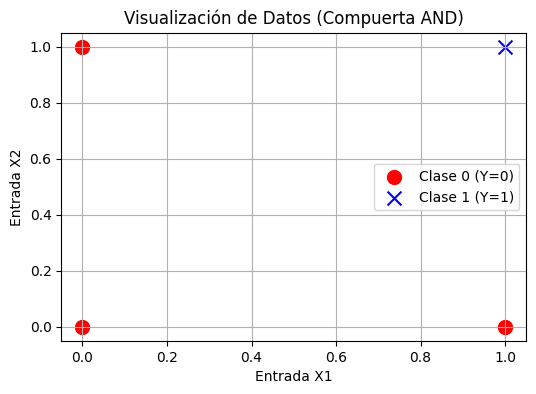

Observamos que los datos son linealmente separables.
Una línea recta (ej. y = -x + 1.5) puede separar los puntos azules de los rojos.


In [4]:
# Visualización de los datos
plt.figure(figsize=(6, 4))

# Dibujar puntos para la Clase 0 (Rojo)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', s=100, label='Clase 0 (Y=0)')

# Dibujar puntos para la Clase 1 (Azul)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', s=100, label='Clase 1 (Y=1)')

plt.title('Visualización de Datos (Compuerta AND)')
plt.xlabel('Entrada X1')
plt.ylabel('Entrada X2')
plt.legend()
plt.grid(True)
plt.show()

print("Observamos que los datos son linealmente separables.")
print("Una línea recta (ej. y = -x + 1.5) puede separar los puntos azules de los rojos.")

### 1.4.2 Model Selection (Selección del Modelo)

**Razones formales para emplear un clasificador lineal (Perceptrón):**

Como se observó en la gráfica anterior, el conjunto de datos de la compuerta AND es **linealmente separable**. Existe un hiperplano (en este caso 2D, una línea recta) que puede separar perfectamente las muestras de la Clase 0 de las muestras de la Clase 1.

El Perceptrón es un clasificador lineal por definición. Su "límite de decisión" (la frontera que aprende) es siempre un hiperplano. Dado que nuestro problema es linealmente separable, el **Teorema de Convergencia del Perceptrón** (de Rosenblatt) garantiza que el algoritmo del Perceptrón encontrará un hiperplano que separe los datos (convergerá) en un número finito de pasos.

Por lo tanto, el Perceptrón es el modelo más simple e idóneo para esta tarea.

### 1.4.3 Model Training (Entrenamiento del Modelo)

Ahora, instanciaremos la clase `Perceptron` de scikit-learn y la entrenaremos usando el método `.fit()`.

In [5]:
# 1. Instanciar el modelo
# eta0 = Tasa de aprendizaje (qué tan rápido aprende)
# max_iter = Número máximo de épocas (pasadas por los datos)
# random_state = Semilla para que el experimento sea reproducible
perceptron_model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# 2. Entrenar el modelo (Ajustar los pesos w y el sesgo b)
# El método .fit() ejecuta el algoritmo de aprendizaje
perceptron_model.fit(X, y)

print("¡Entrenamiento completado!")

# El modelo entrenado almacena los pesos (w) y el sesgo (b)
print(f"Pesos aprendidos (w): {perceptron_model.coef_}")
print(f"Sesgo aprendido (b): {perceptron_model.intercept_}")

¡Entrenamiento completado!
Pesos aprendidos (w): [[0.2 0.2]]
Sesgo aprendido (b): [-0.2]


Los pesos `w` (en `coef_`) y el sesgo `b` (en `intercept_`) definen la línea de decisión que el modelo aprendió. La ecuación de la línea es $w_1 \cdot X_1 + w_2 \cdot X_2 + b = 0$.

### 1.4.4 Prediction (Predicción)

Una vez entrenado, podemos usar el método `.predict()` para ver qué predice el modelo para cada patrón de entrada. Crearemos una función de ayuda para probar esto de manera clara.

In [6]:
def probar_perceptron(model, X_data, y_data):
    """
    Función para probar y reportar la clasificación de cada patrón de entrada.
    """
    print("\n--- Probando el Modelo (Patrón por Patrón) ---")
    
    correctas = 0
    for i in range(len(X_data)):
        # Tomamos un patrón (fila) de X
        patron_entrada = X_data[i]
        etiqueta_real = y_data[i]
        
        # El modelo espera una entrada 2D (batch_size, n_features)
        # Usamos .reshape(1, -1) para convertir [X1, X2] en [[X1, X2]]
        patron_formateado = patron_entrada.reshape(1, -1)
        
        # Realizar la predicción
        prediccion = model.predict(patron_formateado)
        
        # Comparar
        es_correcta = (prediccion[0] == etiqueta_real)
        if es_correcta:
            correctas += 1
            
        print(f"Entrada: {patron_entrada} -> Predicción: {prediccion[0]} (Real: {etiqueta_real}) | {'CORRECTO' if es_correcta else 'INCORRECTO'}")

    print(f"\nTotal correctas: {correctas} de {len(X_data)}")

# Probar el modelo con los mismos datos de entrenamiento
probar_perceptron(perceptron_model, X, y)


--- Probando el Modelo (Patrón por Patrón) ---
Entrada: [0 0] -> Predicción: 0 (Real: 0) | CORRECTO
Entrada: [0 1] -> Predicción: 0 (Real: 0) | CORRECTO
Entrada: [1 0] -> Predicción: 0 (Real: 0) | CORRECTO
Entrada: [1 1] -> Predicción: 1 (Real: 1) | CORRECTO

Total correctas: 4 de 4


### 1.4.5 Model Evaluation (Evaluación del Modelo)

Finalmente, calculamos una métrica formal para evaluar el rendimiento general del modelo. Para problemas de clasificación, la métrica más simple es el **Accuracy** (Precisión Global).

**Accuracy:** Mide el porcentaje de predicciones que el modelo hizo correctamente sobre el total de muestras.
$$\text{Accuracy} = \frac{\text{Número de Predicciones Correctas}}{\text{Número Total de Muestras}}$$

Usaremos la función `accuracy_score` de scikit-learn.

In [7]:
# 1. Obtener predicciones para TODO el conjunto de datos a la vez
y_pred = perceptron_model.predict(X)

# 2. Calcular el Accuracy comparando las etiquetas reales (y) con las predichas (y_pred)
accuracy = accuracy_score(y, y_pred)

print("\n--- Evaluación del Modelo (Métrica Accuracy) ---")
print(f"Etiquetas Reales (y):    {y}")
print(f"Predicciones (y_pred): {y_pred}")
print(f"Accuracy (Precisión Global): {accuracy * 100:.2f}%")

print("\n--- Explicación de Resultados ---")
print(f"El modelo ha alcanzado un {accuracy * 100:.2f}% de Accuracy.")
print("Esto significa que clasificó correctamente el 100% de los patrones de entrada (4 de 4).")
print("Este resultado es el esperado, ya que el Perceptrón convergió exitosamente en este problema linealmente separable.")


--- Evaluación del Modelo (Métrica Accuracy) ---
Etiquetas Reales (y):    [0 0 0 1]
Predicciones (y_pred): [0 0 0 1]
Accuracy (Precisión Global): 100.00%

--- Explicación de Resultados ---
El modelo ha alcanzado un 100.00% de Accuracy.
Esto significa que clasificó correctamente el 100% de los patrones de entrada (4 de 4).
Este resultado es el esperado, ya que el Perceptrón convergió exitosamente en este problema linealmente separable.


## Referencias Bibliográficas

1.  **Rosenblatt, F. (1957).** *The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain.* Psychological Review, 64(6), 386–408. (El paper original).
2.  **Raschka, S., & Mirjalili, V. (2019).** *Python Machine Learning (3rd ed.).* Packt Publishing. (El Capítulo 2 introduce el Perceptrón).
3.  **Scikit-learn Documentation.** *1.1. Linear Models - Perceptron.* Recuperado de: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
4.  **Haykin, S. (2009).** *Neural Networks and Learning Machines (3rd ed.).* Pearson. (Un texto clásico sobre redes neuronales).
5.  **OpenAI. (2024).** *ChatGPT.* (Modelo de lenguaje grande). Consultado el 3/11/2025, de [https://chat.openai.com/](https://chat.openai.com/)